In [7]:
import numpy as np
#from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8, 5]

In [2]:
a=3.2
b=0.5
x = np.linspace(0,10,202)

mean = 0
std = 1 
num_samples = len(x)
noise = np.random.normal(mean, std, size=num_samples)

y = a*x +b +noise

In [3]:
reg_x=x.reshape(len(x),1) #linear regression model expects a 2D matrix
reg_y=y.reshape(len(y),1) #linear regression model expects a 2D matrix
model = LinearRegression()
model.fit(reg_x,reg_y)
pred_y = model.predict(reg_x)

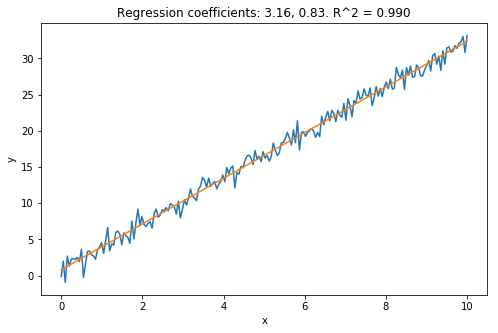

In [8]:
#fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x,y)
plt.plot(reg_x,pred_y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Regression coefficients: {:.2f}, {:.2f}. R^2 = {:.3f}'
             .format(model.coef_[0][0],model.intercept_[0],r2_score(reg_y, pred_y)))
plt.show()

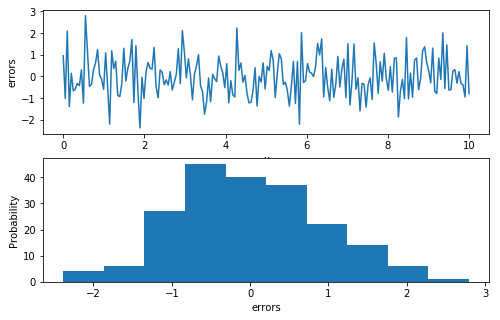

In [9]:
plt.subplot(2, 1, 1)
plt.plot(reg_x,pred_y-reg_y)
plt.ylabel('errors')
plt.xlabel('x')
plt.subplot(2, 1, 2)
bins=10 #default is 10
plt.hist(pred_y-reg_y,bins)
plt.xlabel('errors')
plt.ylabel('Probability')

plt.show()

### Test if errors are normally distributed (Shapiro–Wilk test)

In [6]:
from scipy import stats
test=stats.shapiro(pred_y-reg_y)
print('test statistic = {:.3f}, p-value = {:.3f}'.format(test[0],test[1]))


test statistic = 0.993, p-value = 0.408
